# Beschriftung sich berührender Objekte
Bei der Verarbeitung von Bildern aus der Fluoreszenzmikroskopie stehen wir oft vor dem Problem, dass sich Objekte berühren, die eigentlich unterschieden werden sollten. Wenn wir jedoch nach der Schwellenwertbildung eine Zusammenhangskomponenten-Markierung anwenden, erhalten wir ein markiertes Objekt, wo wir glauben, dass es zwei sein sollten. ImageJ-Benutzer würden dann den "Watershed"-Algorithmus verwenden, der in der Lage ist, Objekte zu teilen, wenn die Form eines Objekts darauf hindeutet, dass es aus zwei besteht. Einige Funktionen in SimpleITK ermöglichen uns, dasselbe zu tun. Aus Gründen der Programmierungskonvenienz verwenden wir wieder das skriptfähige napari-Plugin [napari-simpleitk-image-processing](https://github.com/haesleinhuepf/napari-simpleitk-image-processing).

In [1]:
import numpy as np
from skimage.io import imread
from pyclesperanto_prototype import imshow
from napari_simpleitk_image_processing import threshold_otsu, touching_objects_labeling, gaussian_blur

Unser Ausgangspunkt ist ein Binärbild mit einigen 8-förmigen Objekten, die wir gerne aufteilen möchten.

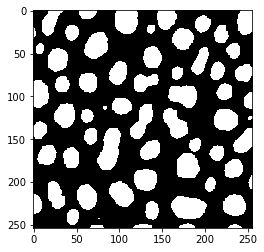

In [2]:
blobs = imread('../../data/blobs.tif')
binary = threshold_otsu(blobs)
imshow(binary)

Die Funktion `touching_objects_labeling` nimmt ein Binärbild als Eingabe und erzeugt ein Labelbild, ähnlich wie bei der Markierung zusammenhängender Komponenten. Das Ergebnis unterscheidet sich jedoch: Die 8-förmigen Objekte werden aufgeteilt.

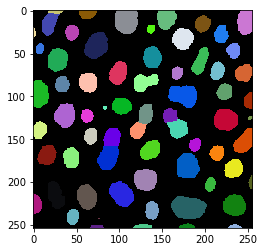

In [3]:
touching_labels = touching_objects_labeling(binary)
imshow(touching_labels, labels=True)

## Feinabstimmung des Ergebnisses
Wenn nicht alle Objekte geteilt werden sollen, kann man das Ergebnis dieses Prozesses durch Modifikation des Binärbildes vor der Übergabe an `touching_objects_labeling` fein abstimmen. Wenn wir zum Beispiel einen Gaußschen Weichzeichnungsfilter vor der Schwellenwertbildung des Bildes anwenden, können wir ein Labelbild erhalten, bei dem weniger Objekte geteilt werden.

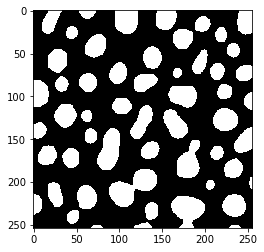

In [4]:
blurred = gaussian_blur(blobs, variance_x=25, variance_y=25)

binary2 = threshold_otsu(blurred)
imshow(binary2)

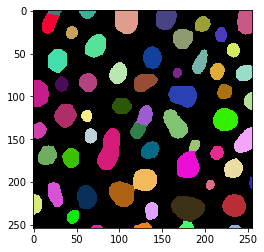

In [5]:
touching_labels = touching_objects_labeling(binary2)
imshow(touching_labels, labels=True)